## General GPyOPt new way of use

In [2]:
%pylab inline
import GPyOpt
import GPy
from numpy.random import seed
seed(1234)

Populating the interactive namespace from numpy and matplotlib


In [7]:
# Problem definition
func      = GPyOpt.objective_examples.experiments2d.sixhumpcamel()

domain =[{'name': 'var_1', 'type': 'continuous', 'domain':(-2,2) },
        {'name': 'var_2', 'type': 'continuous', 'domain': (-2,2)}]

constrains = [
    {'name': 'constr_1', 'constrain': '-x[:,1] -.5 + abs(x[:,0]) - np.sqrt(1-x[:,0]**2)'},
    {'name': 'constr_2', 'constrain': 'x[:,1] +.5 - abs(x[:,0]) - np.sqrt(1-x[:,0]**2)'}]

In [8]:
bo = GPyOpt.methods.BayesianOptimization(func.f, domain, model_type='GP',batch_size=4,acquisition_type ='EI',exact_feval = True)

In [9]:
# --- Stop conditions
max_time  = None 
max_iter  = 5
tolerance = 1e-8     # distance between two consecutive observations  

# Run the optimization                                                  
bo.run_optimization(max_iter = max_iter, max_time = max_time, eps = tolerance) 

*Optimization completed:


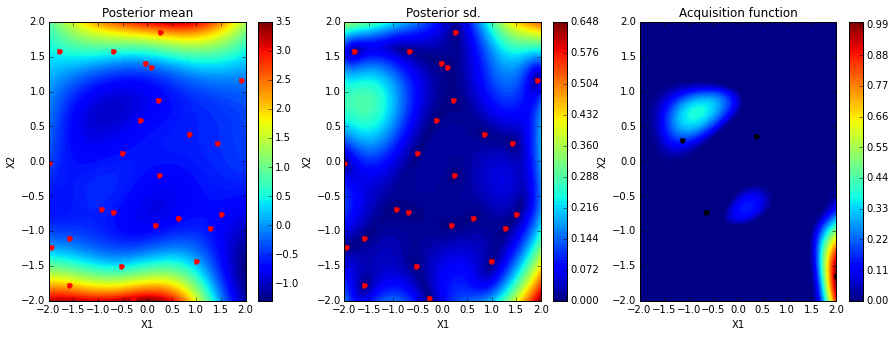

In [10]:
bo.plot_acquisition()

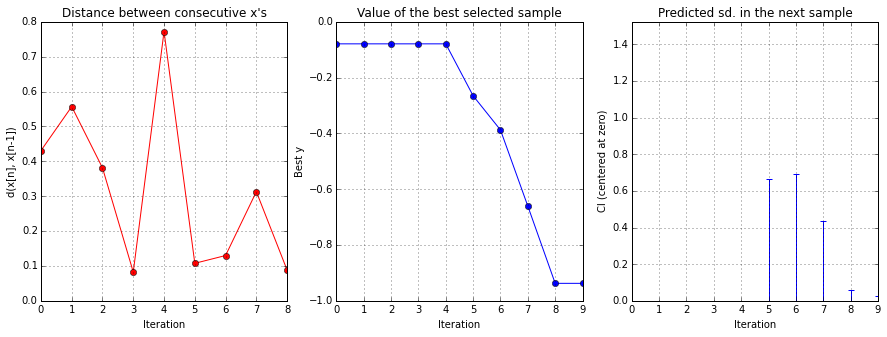

In [6]:
bo.plot_convergence()

In [ ]:
bo.